Mounted at /content/drive
Country or region             Mexico
GDP per capita                 1.070
Social support                 1.323
Healthy life expectancy        0.861
Freedom to make life choices   0.433
Generosity                     0.074
Perceptions of corruption      0.073


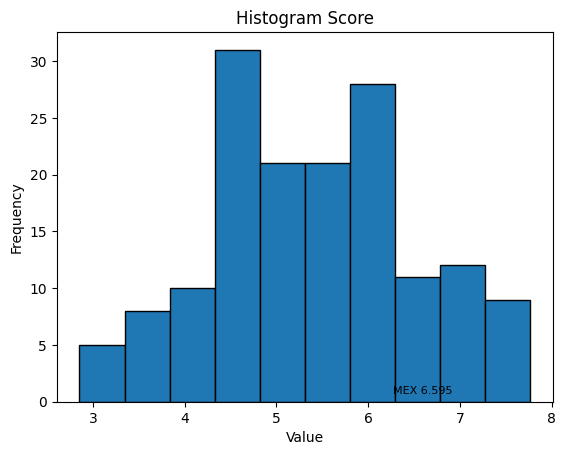

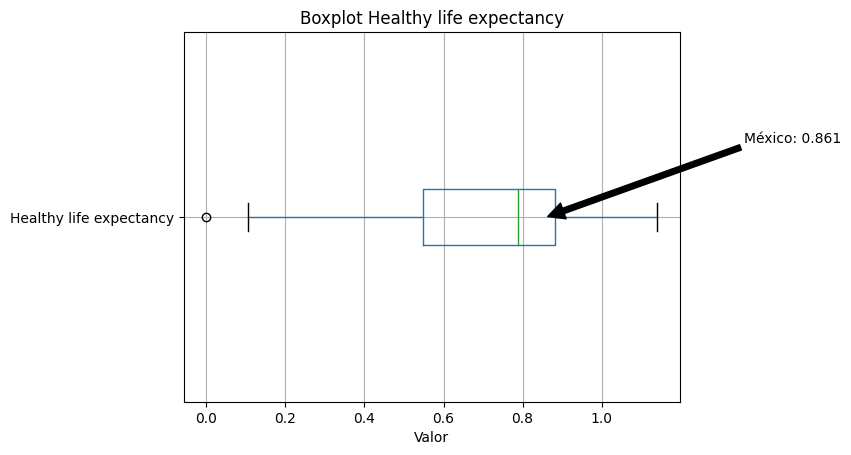

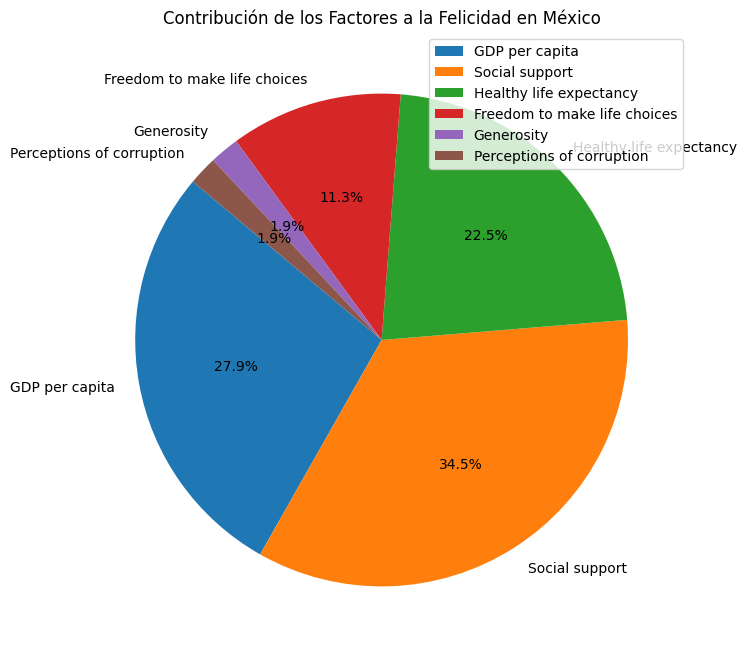

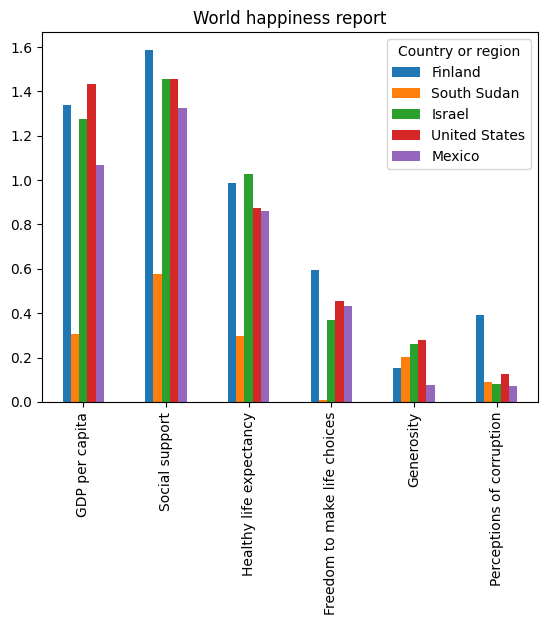

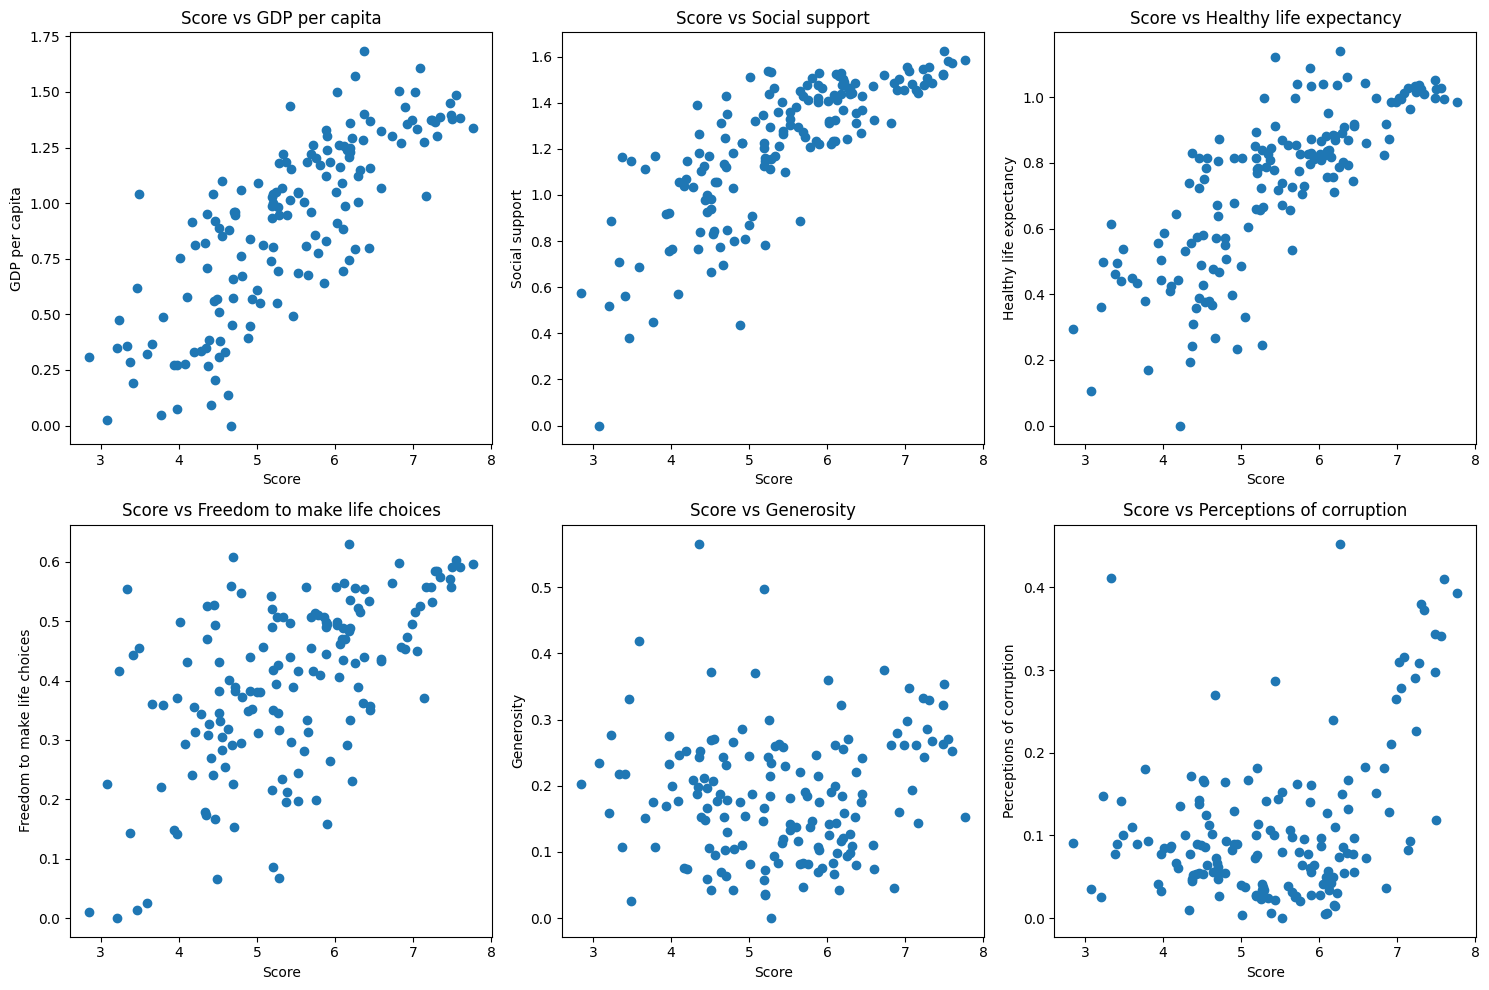

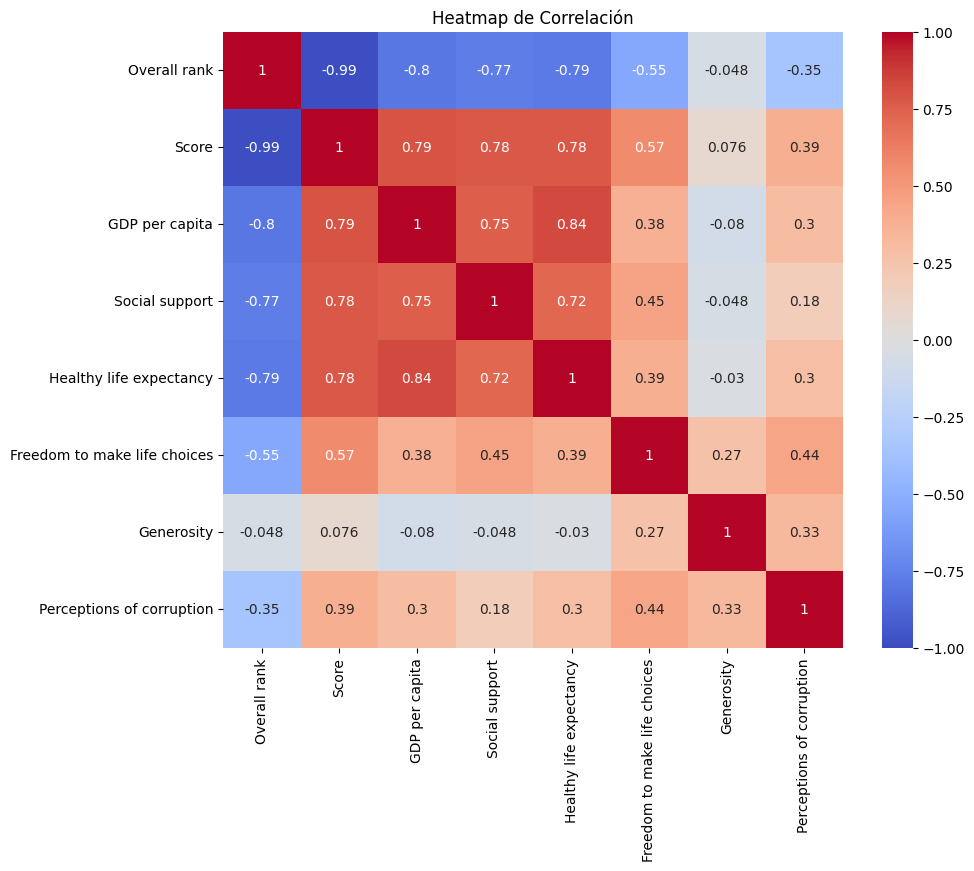

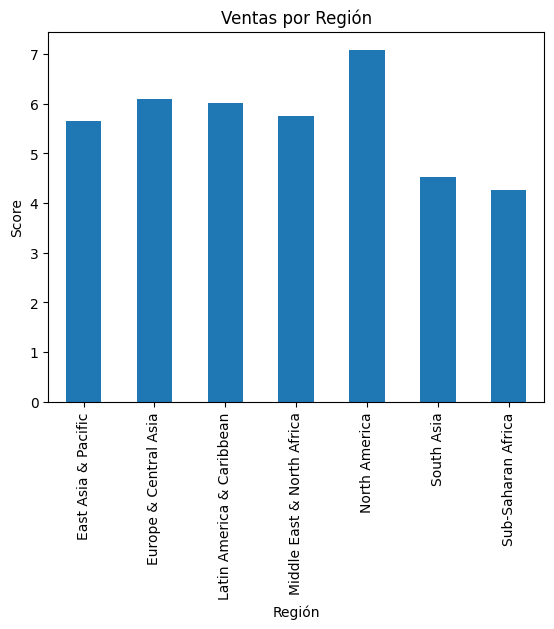

In [16]:
!pip install matplotlib
#Agragar GoogleDrive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Genera conneccion googledrive ara leer el documento csv
rootDir='/content/drive'
drive.mount(rootDir, force_remount=True)

#Leer archivo dentro de un dataframe
directorio = '/content/drive/My Drive/Colab Notebooks/Happiness_report.csv'
dfHappiness = pd.read_csv(directorio,)
#Mexico
mexico=dfHappiness[dfHappiness['Country or region']=='Mexico']
mexico.set_index('Country or region', inplace=True)
mexicoT=mexico[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].T
print(mexicoT)
scoreMex = mexico['Score'].values[0]
healtyMex = mexico['Healthy life expectancy'].values[0]
#Histograma
score=dfHappiness[['Country or region','Score']]
histograma=score['Score'].plot(kind='hist', bins=10, edgecolor='black')
plt.text(scoreMex,0.5,'MEX ' + str(scoreMex),transform=histograma.transData,fontsize=8, ha='center', va='bottom')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Score')
plt.show()
#BoxPlot
healthy=dfHappiness[['Country or region','Healthy life expectancy']]
boxplot=healthy.boxplot(column='Healthy life expectancy', vert=False)
plt.annotate(f'México: {healtyMex}', xy=(healtyMex,1), xytext=(healtyMex + .5 , 1.2),arrowprops=dict(facecolor='black', shrink=0.005))
plt.title('Boxplot Healthy life expectancy')
plt.xlabel('Valor')
plt.show()
#Grafica circular
mexicoT.plot.pie(y='Mexico', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Contribución de los Factores a la Felicidad en México')
plt.ylabel('')  # Para eliminar la etiqueta del eje y
plt.show()
#Grafica 5 paises
max_felicidad = dfHappiness['Score'].max()
min_felicidad = dfHappiness['Score'].min()
filteredMinMax = dfHappiness.query('Score == @max_felicidad or Score == @min_felicidad')
filteredByCountry = dfHappiness[dfHappiness['Country or region'].isin(['Mexico', 'United States','Israel'])]
countries_df = pd.concat([filteredMinMax, filteredByCountry], ignore_index=True)
countries_df=countries_df[['Country or region','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
countries_df.set_index('Country or region', inplace=True)
countries_df=countries_df.transpose()
countries_df.plot(kind='bar')
plt.title('World happiness report')
plt.show()
#Scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for i, factor in enumerate(factors):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(dfHappiness['Score'],dfHappiness[factor])
    axs[row, col].set_title(f'Score vs {factor}')
    axs[row, col].set_xlabel('Score')
    axs[row, col].set_ylabel(factor)
plt.tight_layout()
plt.show()
#Heatmap
heatmap_df=dfHappiness[['Overall rank','Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
heatmap_df = heatmap_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlación')
plt.show()
#Metadata
directorioMeta = '/content/drive/My Drive/Colab Notebooks/Metadata.csv'
dfMetadata = pd.read_csv(directorioMeta,)
metaDF = pd.merge(dfHappiness, dfMetadata ,left_on='Country or region', right_on='TableName', how='inner')
metaDF = metaDF[['Region','Score']].groupby('Region')['Score'].mean().reset_index()
metaDF.set_index('Region', inplace=True)
metaDF.plot(kind='bar', legend=False)
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Score')
plt.show()
